In [227]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler

#from sklearn.experimental import enable_iterative_impute
from sklearn.impute import SimpleImputer,KNNImputer#,IterativeImputer

import warnings
warnings.simplefilter(action = "ignore") 

In [272]:
df = pd.read_csv('diabetes.csv')

In [273]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [249]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [250]:
df.shape

(768, 9)

In [251]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [252]:
(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [253]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

In [254]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

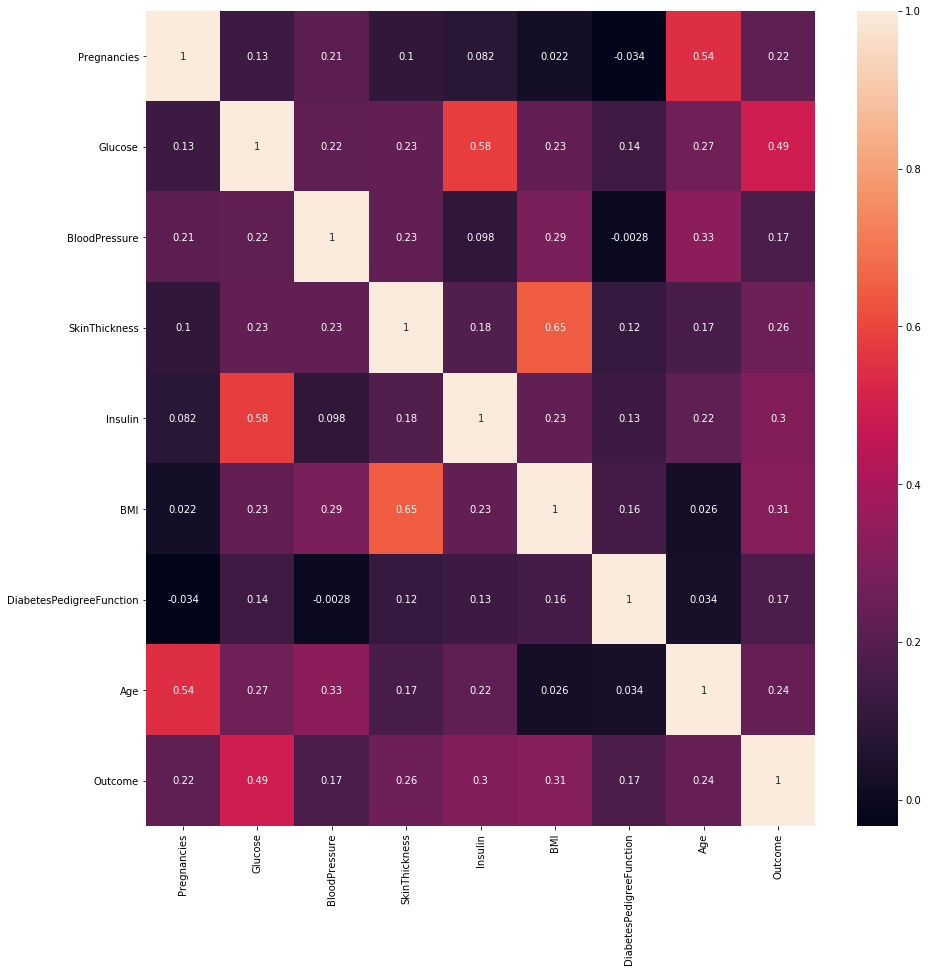

In [255]:
corr= df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr,annot=True)
plt.show()

In [237]:
#df.dropna(inplace=True)

In [238]:
df['Age_bin'] = pd.cut(df['Age'], 4,labels=[1,2,3,4])
df.groupby(['Age_bin']).agg({'SkinThickness':'mean'})
#df['SkinThickness'] = df['SkinThickness'].fillna(df.groupby(['Age_bin'])['SkinThickness'].transform('mean'))

In [239]:
df['Glucose_bin'] = pd.cut(df['Glucose'], 4,labels=[1,2,3,4])
df.groupby(['Glucose_bin']).agg({'SkinThickness':'mean'})
#df['Insulin'] = df['Insulin'].fillna(df.groupby(['Glucose_bin'])['Insulin'].transform('mean'))

In [256]:
knn_imputer = KNNImputer(n_neighbors=5)
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

#df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = pd.DataFrame(knn_imputer.fit_transform(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]))

In [276]:
TEST = df[df['BMI'].isnull()].drop('Outcome',axis=1)

In [277]:
TEST.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age


In [263]:
miss_features = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for feature in miss_features:
    X = df[df[feature].notnull()].drop('Outcome')
    y = df[df[feature].isnull()].drop('Outcome')



In [257]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [258]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

# Modelling

In [259]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report


In [260]:
y = df["Outcome"]
X = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]#df.drop(["Outcome"], axis = 1)

In [261]:
# Tum modellerin train validasyon skorları
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', GradientBoostingClassifier()))
models.append(("LightGBM", LGBMClassifier()))

# evaluate each model in turn
results = []
names = []

LR: 0.769446 (0.025596)
KNN: 0.705742 (0.042648)
CART: 0.656306 (0.026050)
RF: 0.725256 (0.032178)
SVM: 0.651059 (0.003418)
XGB: 0.735663 (0.058177)
LightGBM: 0.727751 (0.034226)


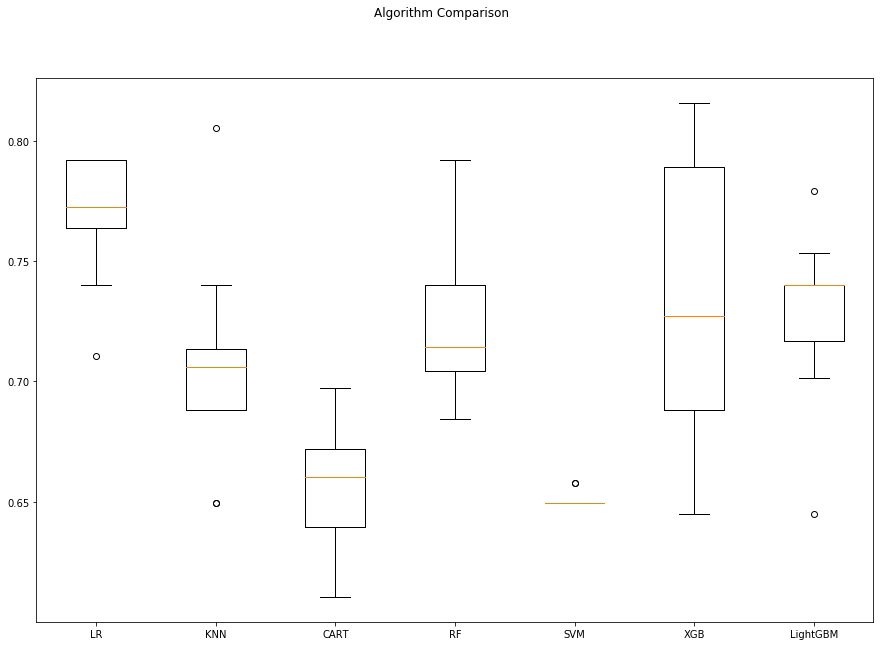

In [262]:
for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = 123456)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [41]:
feature_imp = pd.Series(LightGBM.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

NameError: name 'LightGBM' is not defined

In [153]:
lgbm = RandomForestClassifier(random_state = 12345)
cross_val_score(lgbm, X, y, cv = 10).mean()

0.7881410256410255

In [154]:
#model tuning

lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.5],
              "n_estimators": [500, 1000, 1500],
              "max_depth":[3,5,8]}


In [155]:
gs_cv = GridSearchCV(lgbm, 
                     lgbm_params, 
                     cv = 5, 
                     n_jobs = -1, 
                     verbose = 2).fit(X, y)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


ValueError: Invalid parameter learning_rate for estimator RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

In [151]:
lgbm_tuned = LGBMClassifier(**gs_cv.best_params_).fit(X,y)

In [152]:
cross_val_score(lgbm_tuned, X, y, cv = 10).mean()

0.7907692307692307